# Assignment 1: Sentiment Analysis Classifier

##### Group 26: Michal Dawid Kowalski (up202401554) | Pedro Maria Passos Ribeiro do Carmo Pereira (up201708807) | Santiago Romero Pineda (up)

In this assignment, we will build a sentiment analysis classifier using traditional machine learning techniques. The process includes pre-processing, feature extraction, and exploring both sparse and dense feature representations like word embeddings. We will use "traditional" machine learning classifier instead of deep learning models (CNNs, RNNs, Transformers). The focus will be on understanding text classification techniques and evaluating their performance on the given dataset using common classification metrics like accuracy, precision, recall, and F1-score.



In [1]:
# Import libraries 
from our_eda import *
from our_modeling import *
from our_preprocessing import *
from our_feature_extraction import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from our_feature_selection import *
import gensim.downloader as api
from nltk.tokenize import word_tokenize

/opt/anaconda3/envs/tfenv/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/opt/anaconda3/envs/tfenv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-30 09:40:16.713068: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downlo

# 1. BESSTIE Dataset

## 1.1 Uploading Dataset Files from HuggingFace (https://huggingface.co/mindhunter23)

The dataset is hosted on Hugging Face under the username "mindhunter23." It consists of text data collected from Reddit and Google for the countries UK, AU, and IN. All texts are in English and are labeled with sentiment values: 0 for negative sentiment and 1 for positive sentiment. The dataset is already split into training and validation sets, making it ready for sentiment analysis tasks. It offers diverse content from different regions and platforms.

### - BESSTIE-reddit-sentiment-uk/

In [ ]:
splits = {'train': 'reddit-sentiment-uk-train.jsonl', 'validation': 'reddit-sentiment-uk-valid.jsonl'}
df_reddit_sentiment_uk = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-uk/" + splits["train"], lines=True)
df_reddit_sentiment_uk_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-uk/" + splits["validation"], lines=True)
df_reddit_sentiment_uk.head(5)

In [ ]:
print('Training CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_uk))
print('Validation CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_uk_val))

### - BESSTIE-reddit-sentiment-au/

In [ ]:
splits = {'train': 'reddit-sentiment-au-train.jsonl', 'validation': 'reddit-sentiment-au-valid.jsonl'}
df_reddit_sentiment_au = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-au/" + splits["train"], lines=True)
df_reddit_sentiment_au_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-au/" + splits["validation"], lines=True)
df_reddit_sentiment_au.head(5)

In [ ]:
print('Training CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_au))
print('Validation CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_au_val))

### - BESSTIE-google-sentiment-uk

In [ ]:
splits = {'train': 'google-sentiment-uk-train.jsonl', 'validation': 'google-sentiment-uk-valid.jsonl'}
df_google_sentiment_uk = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-uk/" + splits["train"], lines=True)
df_google_sentiment_uk_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-uk/" + splits["validation"], lines=True)
df_google_sentiment_uk.head(5)

In [ ]:
print('Training CLasses Distribution\n')
print(class_distribution(df_google_sentiment_uk))
print('Validation CLasses Distribution\n')
print(class_distribution(df_google_sentiment_uk_val))

### - BESSTIE-google-sentiment-au

In [ ]:
splits = {'train': 'data/google-sentiment-au-train.jsonl', 'validation': 'data/google-sentiment-au-valid.jsonl'}
df_google_sentiment_au = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-au/" + splits["train"], lines=True)
df_google_sentiment_au_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-au/" + splits["validation"], lines=True)
df_google_sentiment_au.head(5)

In [ ]:
print('Training CLasses Distribution\n')
print(class_distribution(df_google_sentiment_au))
print('Validation CLasses Distribution\n')
print(class_distribution(df_google_sentiment_au_val))

### - BESSTIE-reddit-sentiment-in

In [ ]:
splits = {'train': 'reddit-sentiment-in-train.jsonl', 'validation': 'reddit-sentiment-in-valid.jsonl'}
df_reddit_sentiment_in = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-in/" + splits["train"], lines=True)
df_reddit_sentiment_in_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-in/" + splits["validation"], lines=True)
df_reddit_sentiment_in.head(5)

In [ ]:
print('Training CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_in))
print('Validation CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_in_val))

### - BESSTIE-google-sentiment-in

In [ ]:
splits = {'train': 'google-sentiment-in-train.jsonl', 'validation': 'google-sentiment-in-valid.jsonl'}
df_google_sentiment_in = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-in/" + splits["train"], lines=True)
df_google_sentiment_in_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-in/" + splits["validation"], lines=True)
df_google_sentiment_in.head(5)

In [ ]:
print('Training CLasses Distribution\n')
print(class_distribution(df_google_sentiment_in))
print('Validation CLasses Distribution\n')
print(class_distribution(df_google_sentiment_in_val))

# 2. Initial Data Preprocessing

## 2.1 Testing text_preprocess() func

In [ ]:
# Test the preprocessing function 
print('Original:\n', df_reddit_sentiment_uk.loc[0].text,'\n')
print('Lemmatization:\n',text_preprocess(df_reddit_sentiment_uk.loc[0].text, remove_digits=True, stemmer=Stemmer.WordNet),'\n')
print('Stemming:\n',text_preprocess(df_reddit_sentiment_uk.loc[0].text),'\n')

## 2.2 Concatening datasets
### SENTIMENT DATASET

In [ ]:
# Assue all datasets are already loaded as DataFrames
combined_sentiment_df = pd.concat(
    [
        df_reddit_sentiment_uk,
        df_reddit_sentiment_au,
        df_google_sentiment_uk,
        df_google_sentiment_au,
        df_reddit_sentiment_in,
        df_google_sentiment_in
    ],
    axis=0,  # Concatenate vertically (row-wise)
    ignore_index=True  # Reset the index in the combined DataFrame
)

# Assue all datasets are already loaded as DataFrames
combined_sentiment_df_val = pd.concat(
    [
        df_reddit_sentiment_uk_val,
        df_reddit_sentiment_au_val,
        df_google_sentiment_uk_val,
        df_google_sentiment_au_val,
        df_reddit_sentiment_in_val,
        df_google_sentiment_in_val
    ],
    axis=0,  # Concatenate vertically (row-wise)
    ignore_index=True  # Reset the index in the combined DataFrame
)

In [ ]:
# Save combined data
combined_sentiment_df.to_csv("data_sentiment_preprocessed.csv", index=False)
combined_sentiment_df_val.to_csv("data_sentiment_preprocessed_val.csv", index=False)

# 3. EDA

In [ ]:
# Optional, when already have necessary data files
# combined_sentiment_df = pd.read_csv("data_sentiment_preprocessed.csv")
# combined_sentiment_df_val = pd.read_csv("data_sentiment_preprocessed_val.csv")

# Display the combined DataFrame
print(f"Total rows in combined training dataset: {len(combined_sentiment_df)}\n")
print('\nClasses Distribution in Training Dataset:\n')
class_distribution(combined_sentiment_df)
print('\n')
plt.figure(figsize=(6,4))
combined_sentiment_df['sentiment_label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Labels (Training)')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
print("Training Dataset:\n")
combined_sentiment_df.head(5)

In [ ]:
# Display the combined DataFrame
print(f"Total rows in combined validation dataset: {len(combined_sentiment_df_val)}\n")
print('\nClasses Distribution in Validation Dataset:\n')
class_distribution(combined_sentiment_df)
print('\n')
plt.figure(figsize=(6,4))
combined_sentiment_df_val['sentiment_label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Labels (Validation)')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
print("Validation Dataset:\n")
combined_sentiment_df_val.head(5)

#### Number of characters per review:

In [ ]:
plt.figure(figsize=(8, 4))
combined_sentiment_df['text'].str.len().hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Length (Character Count)', fontsize=12)
plt.xlabel('Character Count', fontsize=10)
plt.ylabel('Sample Count', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(combined_sentiment_df[combined_sentiment_df['sentiment_label'] == 1]['text'].str.len(), bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Positive Reviews', fontsize=12)
ax1.set_xlabel('Character Count', fontsize=10)
ax1.set_ylabel('Sample Count', fontsize=10)
ax1.tick_params(axis='both', labelsize=8)
ax1.grid(True, linestyle='--', alpha=0.7)

ax2.hist(combined_sentiment_df[combined_sentiment_df['sentiment_label'] == 0]['text'].str.len(), bins=50, color='skyblue', edgecolor='black')
ax2.set_title('Negative Reviews', fontsize=12)
ax2.set_xlabel('Character Count', fontsize=10)
ax2.set_ylabel('Sample Count', fontsize=10)
ax2.tick_params(axis='both', labelsize=8)
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Most common words:

In [ ]:
# POSITIVE SENTIMENT
text = " ".join(i for i in combined_sentiment_df[combined_sentiment_df['sentiment_label']==1]['text'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for positive reviews')
plt.show()

In [ ]:
# NEGATIVE SENTIMENT
text = " ".join(i for i in combined_sentiment_df[combined_sentiment_df['sentiment_label']==0]['text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for negative reviews')
plt.show()

# 4. Text Preprocessing

### - Training Dataset

In [ ]:
# Preprocessing + Lemmatization 
combined_sentiment_df['clean_text'] = combined_sentiment_df['text'].apply(lambda x: text_preprocess(x, remove_digits=True, stemmer=Stemmer.WordNet))

In [ ]:
# Tokenization
combined_sentiment_df['tokenized_text'] = combined_sentiment_df['clean_text'].apply(lambda x: word_tokenize(x))
combined_sentiment_df.head(5)

In [ ]:
# Save preprocessed training data
combined_sentiment_df.to_csv('data_sentiment_preprocessed.csv', index=False)

### - Validation Dataset

In [ ]:
# Preprocessing + Lemmatization 
combined_sentiment_df_val['clean_text'] = combined_sentiment_df_val['text'].apply(lambda x: text_preprocess(x, remove_digits=True, stemmer=Stemmer.WordNet))
# Tokenization
combined_sentiment_df_val['tokenized_text'] = combined_sentiment_df_val['clean_text'].apply(lambda x: word_tokenize(x))
combined_sentiment_df_val.head(5)
# Save preprocessed validation data
combined_sentiment_df_val.to_csv('data_sentiment_preprocessed_val.csv', index=False)

# YOU CAN START FROM THIS POINT GUYS!!!!!!!!!!!!!!!

In [3]:
# Optional, when already have necessary data files
combined_sentiment_df = pd.read_csv('data_sentiment_preprocessed.csv')
combined_sentiment_df_val = pd.read_csv('data_sentiment_preprocessed_val.csv')

#### Handling Missing Values:

In [6]:
print(combined_sentiment_df.isnull().value_counts())
combined_sentiment_df = combined_sentiment_df.dropna() # Drop rows where preprocessing didnt extract any tokens

id     text   sentiment_label  clean_text  tokenized_text
False  False  False            False       False             8860
                               True        False                6
Name: count, dtype: int64


In [8]:
print(combined_sentiment_df_val.isnull().value_counts())
combined_sentiment_df_val = combined_sentiment_df_val.dropna()

id     text   sentiment_label  clean_text  tokenized_text
False  False  False            False       False             1211
                               True        False                1
Name: count, dtype: int64


In [10]:
# Tokenization because after reading from the file list with tokens converts into str
combined_sentiment_df['tokenized_text'] = combined_sentiment_df['clean_text'].apply(lambda x: word_tokenize(x))
combined_sentiment_df_val['tokenized_text'] = combined_sentiment_df_val['clean_text'].apply(lambda x: word_tokenize(x))
combined_sentiment_df.head(5)

,id,text,sentiment_label,clean_text,tokenized_text
0,1cimjpr,"So instead of making savings, they continued t...",0,instead make saving continue spend money not y...,"[instead, make, saving, continue, spend, money..."
1,1d35qlg,Needless story to have dragged into the electi...,0,needless story drag election party rumor sit m...,"[needless, story, drag, election, party, rumor..."
2,1d3i3mt,"Now, in an ideal world there would be insight ...",0,ideal world would insight mr james day think i...,"[ideal, world, would, insight, mr, james, day,..."
3,1d5a8wa,How did you not get mind controlled at birth t...,0,not get mind control birth though one free thi...,"[not, get, mind, control, birth, though, one, ..."
4,1d5l3e9,"Talk lately of conscription, having a store of...",0,talk lately conscription store food water drug...,"[talk, lately, conscription, store, food, wate..."


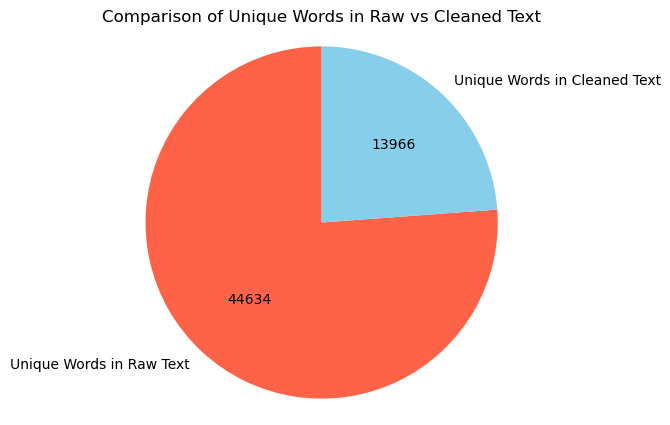

In [11]:
# Check number of unique words before and after the preprocessing
all_words = ' '.join(combined_sentiment_df['text']).split()
unique_words = set(all_words)

all_words_clean = ' '.join(combined_sentiment_df['clean_text']).split()
unique_words_clean = set(all_words_clean)

labels = ['Unique Words in Raw Text', 'Unique Words in Cleaned Text']
sizes = [len(unique_words), len(unique_words_clean)]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct=lambda p: f'{int(p * sum(sizes) / 100)}', startangle=90, colors = ['#FF6347', 'skyblue'])
plt.title('Comparison of Unique Words in Raw vs Cleaned Text')
plt.axis('equal')
plt.show()

# 5. Features Extraction

In [15]:
# Split the data
X_train = combined_sentiment_df.tokenized_text
y_train = combined_sentiment_df.sentiment_label
X_val = combined_sentiment_df_val.tokenized_text
y_val = combined_sentiment_df_val.sentiment_label

## 5.1 Basic BoW
+ removing words that occurs less than 3 times

In [626]:
# Convert X_train and X_val into proper type
X_train_str = [' '.join(tokens) for tokens in combined_sentiment_df.tokenized_text]

X_val_str = [' '.join(tokens) for tokens in combined_sentiment_df_val.tokenized_text]

word_counts, vocab, selected_words, vectorizer, X_train_vec, X_val_vec = basic_bag(X_train_str, X_val_str, debug=True, min_refs=2)

Shape (X_train_vec):  (8860, 13942)
Shape (X_train_vec) after reduction:  (8860, 8068)
Shape (X_val_vec):  (1211, 8068)


In [28]:
# 10 most common words
word_counts = np.asarray(X_train_vec.sum(axis=0)).flatten()
vocab = np.array(vectorizer.get_feature_names_out())

top_indices = np.argsort(word_counts)[::-1]
top_words = vocab[top_indices[:10]]
top_counts = word_counts[top_indices[:10]]

print('Top 10 most common words:\n')
for word, count in zip(top_words, top_counts):
    print(f"{word}: {count}")

Top 10 most common words:

not: 4523
good: 3415
food: 2608
get: 1843
go: 1610
place: 1569
like: 1549
would: 1527
time: 1374
one: 1363


In [30]:
# Just values test
unique = np.unique(X_train_vec[2].toarray())
print('Unique values:', unique)

Unique values: [0 1 2]


In [32]:
# Convert X_train and X_val into proper type
X_train_str = [' '.join(tokens) for tokens in combined_sentiment_df.tokenized_text]

X_val_str = [' '.join(tokens) for tokens in combined_sentiment_df_val.tokenized_text]

word_counts, vocab, selected_words, vectorizer, X_train_vec, X_val_vec = basic_bag(X_train_str, X_val_str, debug=True)

Shape (X_train_vec):  (8860, 13942)
Shape (X_val_vec):  (1211, 13942)


## 5.2 1-hot BoW
+ removing words that occurs less than 3 times

In [34]:
word_counts, vocab, selected_words, vectorizer, X_train_hot, X_val_hot = basic_bag(X_train_str, X_val_str, min_refs=2, ohe=True, debug=True)

Shape (X_train_vec):  (8860, 13942)
Shape (X_train_vec) after reduction:  (8860, 8068)
Shape (X_val_vec):  (1211, 8068)


In [36]:
# Checking if dataset is binary
unique = np.unique(X_train_hot.toarray())
print('Unique values:', unique)

Unique values: [0 1]


## 5.3 TF-IDF

In [38]:
word_counts, vocab, selected_words, vectorizer, X_train_vec_tf, X_val_vec_tf = tf_idf(X_train_str, X_val_str, debug=True, min_refs=2)

Shape (X_train_vec):  (8860, 13942)
Shape (X_train_vec) after reduction:  (8860, 8068)
Shape (X_val_vec):  (1211, 8068)


## 5.4 N-grams

### 5.4.1 Bigrams Count

In [18]:
word_counts, vocab, selected_words, vectorizer, X_train_vec_bi, X_val_vec_bi = basic_bag(X_train_str, X_val_str, ngram_range=(2,2), debug=True, ohe=True)

Shape (X_train_vec):  (8860, 161809)
Shape (X_val_vec):  (1211, 161809)


In [35]:
bigram_vocab = vectorizer.get_feature_names_out()
bigram_counts = np.asarray(X_train_vec_bi.sum(axis=0)).flatten()

bigram_freq = list(zip(bigram_vocab, bigram_counts))

# Sorting
sorted_bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)
print("10 most common bigrams:\n")
for bigram, count in sorted_bigram_freq[:10]:
    print(f"{bigram}: {count}")

10 most common bigrams:

food good: 193
staff friendly: 160
not good: 138
good place: 125
good food: 120
taste good: 118
really good: 117
look like: 114
service good: 108
friendly staff: 106


### 5.4.2 Bigrams TF-IDF

In [23]:
word_counts, vocab, selected_words, vectorizer, X_train_vec_bi_tf, X_val_vec_bi_tf = tf_idf(X_train_str, X_val_str, ngram_range=(2, 2) , min_refs=2, debug=True)

Shape (X_train_vec):  (8860, 161809)
Shape (X_train_vec) after reduction:  (8860, 22912)
Shape (X_val_vec):  (1211, 22912)


## 5.5 Words Embedding

### Word2Vec

#### - Own Word2Vec Model (CBOW)

In [59]:
word2vec_model1 = w2v_embeddings(X_train, alpha=0.05, vector_size=300, window=10, epochs=20, min_count=2)

In [61]:
# Similarity between tokens
try:
    similarity_tokens = word2vec_model1.wv.similarity('cat', 'dog')
    print(f"Similarity: {similarity_tokens:.4f}")
except KeyError as e:
    print(f"KeyError: {e}")

# Most similar words to the specific token
try:
    similar_words_token = word2vec_model1.wv.most_similar('cat', topn=5)
    print("Most similar words:", similar_words_token)
except KeyError as e:
    print(f"KeyError: {e}")

# Token which doesn't match (Odd-One-Out)
try: 
    not_match_token = word2vec_model1.wv.doesnt_match(['cat','dog','juice'])
    print('Not matching word:', not_match_token)
except KeyError as e:
    print(f"KeyError: {e}")

# Perform an analogy task
try:
    analogy_result = word2vec_model1.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
    print("Analogy result:", analogy_result)
except KeyError as e:
    print(f"KeyError: {e}")

Similarity: 0.8344
Most similar words: [('actress', 0.9955834150314331), ('dakota', 0.9949900507926941), ('mesh', 0.9949254989624023), ('goodby', 0.994763970375061), ('balanced', 0.9944737553596497)]
Not matching word: juice
Analogy result: [('indian', 0.9518129825592041)]


In [63]:
print('Number of unique words in the Word2vec Model:',len(word2vec_model1.wv.key_to_index))

Number of unique words in the Word2vec Model: 8130


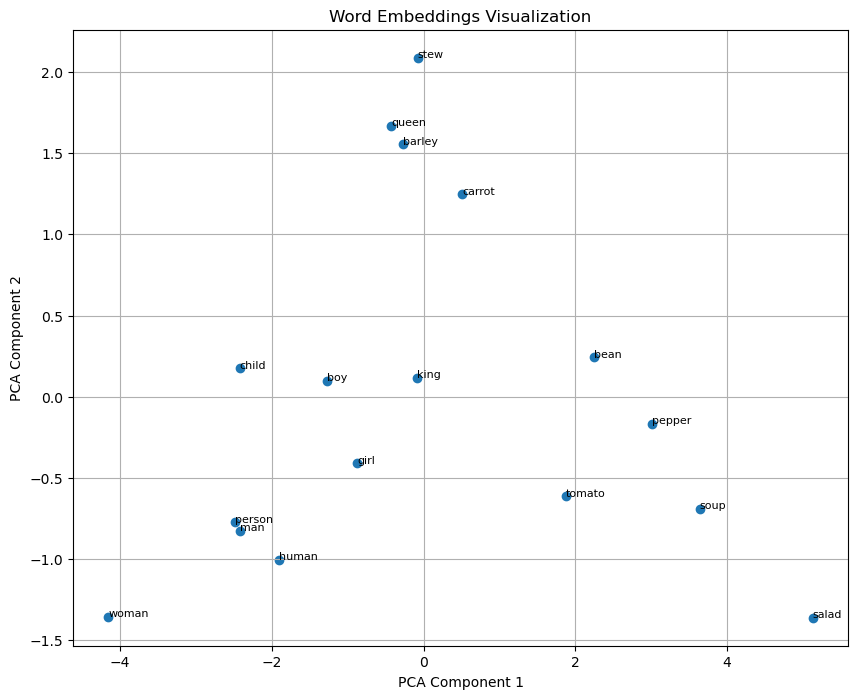

In [65]:
# Visualization
# List of words that we want to display
words_to_explore= ['woman', 'man', 'queen', 'king', 'human', 'person', 'girl', 'child', 'boy', 'salad', 'lettuce', 'tomato', 'soup', 'turnip', 'arugula', 'pepper', 'greens', 'barley', 'bean', 'stew', 'carrot']
visualize_word_embeddings(word2vec_model1, words_to_explore)

In [67]:
# Generate embeddings
X_train_vec_w2v, X_val_vec_w2v = w2v_embeddings_split(X_train, X_val, word2vec_model1)

In [71]:
# TEST ONLY
model = SVC()
model.fit(X_train_vec_w2v, y_train)
y_pred = model.predict(X_val_vec_w2v)

print(accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.8067712634186622
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       611
           1       0.82      0.78      0.80       600

    accuracy                           0.81      1211
   macro avg       0.81      0.81      0.81      1211
weighted avg       0.81      0.81      0.81      1211



#### - Own Word2Vec Model (Skip Gram)

In [35]:
word2vec_model2 = w2v_embeddings(X_train, sg=True, alpha=0.05, vector_size=300, window=5, epochs=50, min_count=2)

In [36]:
# Similarity between tokens
try:
    similarity_tokens = word2vec_model2.wv.similarity('cat', 'dog')
    print(f"Similarity: {similarity_tokens:.4f}")
except KeyError as e:
    print(f"KeyError: {e}")

# Most similar words to the specific token
try:
    similar_words_token = word2vec_model2.wv.most_similar('dog', topn=10)
    print("Most similar words:", similar_words_token)
except KeyError as e:
    print(f"KeyError: {e}")

# Token which doesn't match (Odd-One-Out)
try: 
    not_match_token = word2vec_model2.wv.doesnt_match(['cat','dog','wine'])
    print('Not matching word:', not_match_token)
except KeyError as e:
    print(f"KeyError: {e}")

# Perform an analogy task
try:
    analogy_result = word2vec_model2.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
    print("Analogy result:", analogy_result)
except KeyError as e:
    print(f"KeyError: {e}")

Similarity: 0.6531
Most similar words: [('drinking', 0.772953450679779), ('pet', 0.7704237103462219), ('cigar', 0.769462525844574), ('soothe', 0.7648403644561768), ('fountain', 0.7639871835708618), ('refresh', 0.7617489099502563), ('rider', 0.7597284913063049), ('basket', 0.7571843266487122), ('mixture', 0.7553753852844238), ('bartender', 0.754408597946167)]
Not matching word: wine
Analogy result: [('kingdom', 0.697913408279419)]


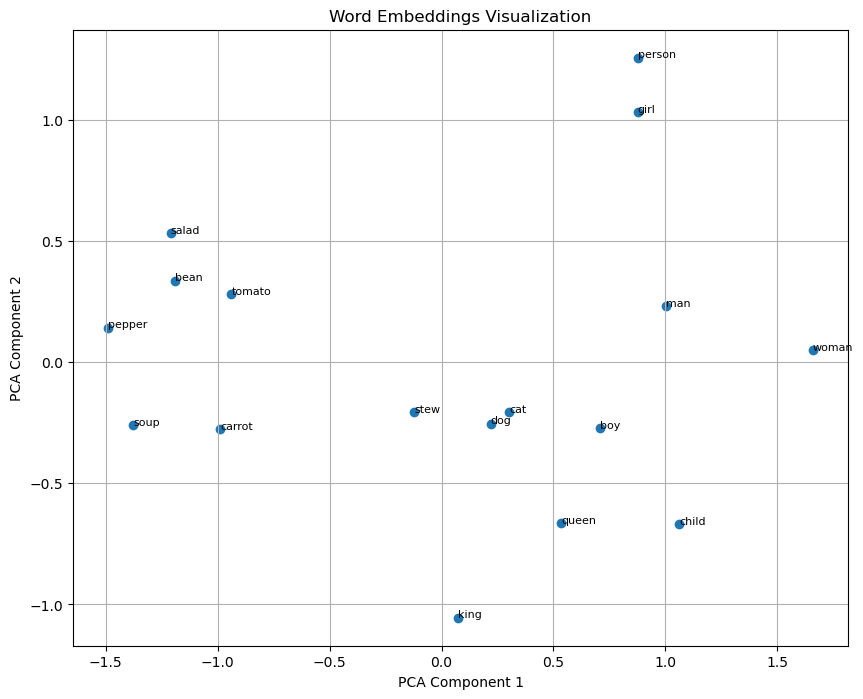

In [37]:
# Visualization
# List of words that we want to display
words_to_explore= ['woman', 'man', 'queen', 'king', 'person', 'girl', 'child', 'boy', 'salad', 'lettuce', 'turnip', 'arugula', 'pepper', 'greens', 'bean', 'stew', 'carrot','tomato', 'soup', 'cat', 'dog', 'hamster']
visualize_word_embeddings(word2vec_model2, words_to_explore)

In [ ]:
# Generate embeddings
X_train_vec_w2v, X_val_vec_w2v = w2v_embeddings_split(X_train, X_val, word2vec_model1)

### Bert Embeddings

In [ ]:
# Split the data
X_train = combined_sentiment_df.text.astype(str).tolist()
y_train = combined_sentiment_df.sentiment_label
X_val = combined_sentiment_df_val.text.astype(str).tolist()
y_val = combined_sentiment_df_val.sentiment_label

# Generate embeddings
X_train_vec, X_val_vec = bert_embeddings_split(X_train, X_val)

# 6. Feature Selection

In [ ]:
combined_sentiment_df = pd.read_csv("data_sentiment_preprocessed.csv")
combined_sentiment_df_val = pd.read_csv("data_sentiment_preprocessed_val.csv")

from our_feature_extraction import basic_bag, tf_idf
# Split the data
X_train = combined_sentiment_df.tokenized_text
y_train = combined_sentiment_df.sentiment_label
X_val = combined_sentiment_df_val.tokenized_text
y_val = combined_sentiment_df_val.sentiment_label
word_counts, vocab, selected_words, vectorizer, X_train_vec, X_val_vec = basic_bag(X_train, X_val, ohe=True, debug=True)

In [20]:
from our_feature_selection import *

print(X_train_vec.shape)
sel, X_train_redux, X_test_redux = feat_filtering(X_train_vec, y_train, X_val_vec)
print(X_train_redux.shape)

(8860, 8068)
(8860, 807)


In [ ]:
sel, X_train_rfe, X_test_rfe = rfe(X_train_vec, y_train, X_val_vec)
print(X_train_rfe.shape)

In [ ]:
nb(X_train_vec, X_val_vec, y_train, y_val)

In [ ]:
nb(X_train_rfe, X_test_rfe, y_train, y_val)

In [ ]:
nb(X_train_redux, X_test_redux, y_train, y_val)

# 7. Modeling

## 7.1 Naive Bayes Model

### - Basic BoW

In [ ]:
# Basic BoW
nb(X_train_vec, X_val_vec, y_train, y_val)

In [16]:
# Featres Selection Chi2
print(X_train_vec.shape)
sel, X_train_redux, X_test_redux = feat_filtering(X_train_vec, y_train, X_val_vec)
print(X_train_redux.shape)

(8860, 13942)
(8860, 1394)


In [17]:
nb(X_train_redux, X_test_redux, y_train, y_val)

Accuracy: 0.8134

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       611
           1       0.80      0.83      0.82       600

    accuracy                           0.81      1211
   macro avg       0.81      0.81      0.81      1211
weighted avg       0.81      0.81      0.81      1211


Confusion Matrix:
[[486 125]
 [101 499]]


### - 1-hot BoW

In [54]:
nb(X_train_hot, X_val_hot, y_train, y_val)

Accuracy: 0.8084

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       611
           1       0.79      0.84      0.81       600

    accuracy                           0.81      1211
   macro avg       0.81      0.81      0.81      1211
weighted avg       0.81      0.81      0.81      1211


Confusion Matrix:
[[473 138]
 [ 94 506]]


In [55]:
# Featres Selection Chi2
print(X_train_vec.shape)
sel, X_train_redux, X_test_redux = feat_filtering(X_train_hot, y_train, X_val_hot)
print(X_train_redux.shape)

(8860, 8068)
(8860, 807)


In [56]:
nb(X_train_redux, X_test_redux, y_train, y_val)

Accuracy: 0.8101

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       611
           1       0.80      0.82      0.81       600

    accuracy                           0.81      1211
   macro avg       0.81      0.81      0.81      1211
weighted avg       0.81      0.81      0.81      1211


Confusion Matrix:
[[489 122]
 [108 492]]


### - TF-IDF

In [13]:
nb(X_train_vec_tf, X_val_vec_tf, y_train, y_val)

Accuracy: 0.8068

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       611
           1       0.78      0.86      0.81       600

    accuracy                           0.81      1211
   macro avg       0.81      0.81      0.81      1211
weighted avg       0.81      0.81      0.81      1211


Confusion Matrix:
[[462 149]
 [ 85 515]]


In [59]:
# Featres Selection Chi2
print(X_train_vec.shape)
sel, X_train_redux, X_test_redux = feat_filtering(X_train_vec_tf, y_train, X_val_vec_tf)
print(X_train_redux.shape)

(8860, 8068)
(8860, 807)


In [60]:
 nb(X_train_redux, X_test_redux, y_train, y_val)

Accuracy: 0.8092

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       611
           1       0.79      0.83      0.81       600

    accuracy                           0.81      1211
   macro avg       0.81      0.81      0.81      1211
weighted avg       0.81      0.81      0.81      1211


Confusion Matrix:
[[479 132]
 [ 99 501]]


### - Bigrams Count

In [19]:
nb(X_train_vec_bi, X_val_vec_bi, y_train, y_val)

Accuracy: 0.7919

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       611
           1       0.78      0.81      0.80       600

    accuracy                           0.79      1211
   macro avg       0.79      0.79      0.79      1211
weighted avg       0.79      0.79      0.79      1211


Confusion Matrix:
[[470 141]
 [111 489]]


In [77]:
# Featres Selection Chi2
print(X_train_vec.shape)
sel, X_train_redux, X_test_redux = feat_filtering(X_train_vec_bi, y_train, X_val_vec_bi)
print(X_train_redux.shape)

(8860, 8068)
(8860, 2291)


In [78]:
nb(X_train_redux, X_test_redux, y_train, y_val)

Accuracy: 0.7845

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       611
           1       0.84      0.70      0.76       600

    accuracy                           0.78      1211
   macro avg       0.79      0.78      0.78      1211
weighted avg       0.79      0.78      0.78      1211


Confusion Matrix:
[[532  79]
 [182 418]]


### - Bigrams TF-IDF

In [24]:
nb(X_train_vec_bi_tf, X_val_vec_bi_tf, y_train, y_val)

Accuracy: 0.7903

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       611
           1       0.80      0.77      0.78       600

    accuracy                           0.79      1211
   macro avg       0.79      0.79      0.79      1211
weighted avg       0.79      0.79      0.79      1211


Confusion Matrix:
[[496 115]
 [139 461]]


In [82]:
# Featres Selection Chi2
print(X_train_vec.shape)
sel, X_train_redux, X_test_redux = feat_filtering(X_train_vec_bi_tf, y_train, X_val_vec_bi_tf)
print(X_train_redux.shape)

(8860, 8068)
(8860, 2292)


In [83]:
nb(X_train_redux, X_test_redux, y_train, y_val)

Accuracy: 0.7688

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       611
           1       0.82      0.69      0.75       600

    accuracy                           0.77      1211
   macro avg       0.78      0.77      0.77      1211
weighted avg       0.78      0.77      0.77      1211


Confusion Matrix:
[[519  92]
 [188 412]]


## 7.2 Support Vector Machine (SVM)

### - Basic BoW

In [ ]:
support_vector_machine(X_train_vec, X_val_vec, y_train, y_val)

### - 1-hot BoW

In [34]:
support_vector_machine(X_train_hot, X_val_hot, y_train, y_val)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best Cross-Validation Accuracy: 0.7880361173814899
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       611
           1       0.87      0.78      0.82       600

    accuracy                           0.83      1211
   macro avg       0.83      0.83      0.83      1211
weighted avg       0.83      0.83      0.83      1211

Accuracy: 0.8298926507018992


In [35]:
# Features Selection Chi2
print(X_train_vec.shape)
sel, X_train_redux, X_test_redux = feat_filtering(X_train_hot, y_train, X_val_hot)
print(X_train_redux.shape)

(8860, 13942)
(8860, 807)


In [36]:
support_vector_machine(X_train_redux, X_test_redux, y_train, y_val)

Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8023702031602709
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       611
           1       0.85      0.80      0.82       600

    accuracy                           0.83      1211
   macro avg       0.83      0.83      0.83      1211
weighted avg       0.83      0.83      0.83      1211

Accuracy: 0.8307184145334434


In [37]:
#RFE
sel, X_train_redux, X_test_redux = rfe(X_train_hot, y_train, X_val_hot, min_features_to_select=int(X_train_hot.shape[1]*0.9), save_file=True)

In [38]:
support_vector_machine(X_train_redux, X_test_redux, y_train, y_val)

Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.7882618510158014
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       611
           1       0.88      0.75      0.81       600

    accuracy                           0.83      1211
   macro avg       0.84      0.83      0.83      1211
weighted avg       0.84      0.83      0.83      1211

Accuracy: 0.8282411230388109


### - TF-IDF

In [26]:
support_vector_machine(X_train_vec_tf, X_val_vec_tf, y_train, y_val)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.7993227990970654
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       611
           1       0.88      0.82      0.85       600

    accuracy                           0.86      1211
   macro avg       0.86      0.86      0.86      1211
weighted avg       0.86      0.86      0.86      1211

Accuracy: 0.8587943848059455


In [28]:
# Featres Selection Chi2
print(X_train_vec.shape)
sel, X_train_redux, X_test_redux = feat_filtering(X_train_vec_tf, y_train, X_val_vec_tf)
print(X_train_redux.shape)

(8860, 13942)
(8860, 807)


In [29]:
# Chi2
support_vector_machine(X_train_redux, X_test_redux, y_train, y_val)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8110609480812642
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       611
           1       0.87      0.81      0.84       600

    accuracy                           0.85      1211
   macro avg       0.85      0.85      0.85      1211
weighted avg       0.85      0.85      0.85      1211

Accuracy: 0.8455821635012386


In [31]:
from our_feature_selection import rfe

sel, X_train_redux, X_test_redux = rfe(X_train_vec_tf, y_train, X_val_vec_tf, min_features_to_select=int(X_train_vec_tf.shape[1]*0.9), save_file=True)

In [32]:
# RFE
support_vector_machine(X_train_redux, X_test_redux, y_train, y_val)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.7993227990970654
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       611
           1       0.88      0.82      0.85       600

    accuracy                           0.86      1211
   macro avg       0.86      0.86      0.86      1211
weighted avg       0.86      0.86      0.86      1211

Accuracy: 0.8587943848059455


### - Bigrams

In [ ]:
support_vector_machine(X_train_vec_bi, X_val_vec_bi, y_train, y_val)

### - Word2Vec Embedding

In [53]:
# Word2Vec CBOW 
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

support_vector_machine(X_train_vec_w2v, X_val_vec_w2v, y_train, y_val)

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.7987584650112867
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       611
           1       0.83      0.81      0.82       600

    accuracy                           0.82      1211
   macro avg       0.83      0.82      0.82      1211
weighted avg       0.83      0.82      0.82      1211

Accuracy: 0.8249380677126342


## 7.3 Random Forest

### - Basic BoW

In [ ]:
random_forest(X_train_vec, X_val_vec, y_train, y_val)

### - 1-hot BoW

In [ ]:
random_forest(X_train_hot, X_val_hot, y_train, y_val)

### - TF-IDF

In [ ]:
random_forest(X_train_vec_tf, X_val_vec_tf, y_train, y_val)

### - Bigrams

In [ ]:
random_forest(X_train_vec_bi, X_val_vec_bi, y_train, y_val)

## 7.4 Embedding Modeling

### NB

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_vec)
X_val_scaled = scaler.transform(X_val_vec)


nb(X_train_scaled, X_val_scaled, y_train, y_val)

sel, X_train_redux, X_val_redux = feat_filtering(X_train_scaled, y_train, X_val_scaled, k=2)

nb(X_train_redux, X_val_redux, y_train, y_val)

### SVM

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_vec)
X_val_scaled = scaler.transform(X_val_vec)

In [ ]:
support_vector_machine(X_train_scaled, X_val_scaled, y_train, y_val) # Best Parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'} for bert , but actually it doesn't really matter

In [ ]:
from our_feature_selection import rfe

rfe(X_train_vec, y_train, X_val_vec, min_features_to_select=int(X_train_vec.shape[1]*0.9), save_file=True)

In [ ]:
import pickle
with open('./rfecv_svm.pickle', "rb") as f:
    rfe_sel = pickle.load(f)

In [ ]:
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

best_model = Pipeline([('scaler', MinMaxScaler()), ('svc', SVC(probability=True))])
best_model.fit(X_train_vec, y_train)

y_pred = best_model.predict(X_val_vec)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

# sel, X_train_redux, X_val_redux = feat_filtering(X_train_scaled, y_train, X_val_vec, k=95)
# best_model.fit(X_train_redux, y_train)

# y_pred = best_model.predict(X_val_redux)

# # Evaluate the model
# print("Classification Report:")
# print(classification_report(y_val, y_pred))
# print("Accuracy:", accuracy_score(y_val, y_pred))

# X_train_redux = rfe_sel.transform(X_train_scaled)
# X_val_redux = rfe_sel.transform(X_val_scaled)
# best_model.fit(X_train_redux, y_train)

# y_pred = best_model.predict(X_val_redux)

# # Evaluate the model
# print("Classification Report:")
# print(classification_report(y_val, y_pred))
# print("Accuracy:", accuracy_score(y_val, y_pred))

In [ ]:
with open('./best_model.pickle', "wb") as f:
    pickle.dump(best_model, f)

# 8. Error Analysis

In [ ]:
with open('./best_model.pickle', "rb") as f:
    best_model = pickle.load(f)

In [ ]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer()

def explain_point_label(explainer, predict, pt, num_features=10, num_samples=20):

  explanation = explainer.explain_instance(
      pt,
      predict,
      num_features=5,  # Number of words to display as important
      num_samples=50,  # Number of perturbations to create
  )
  explanation.show_in_notebook(text=True)
  return explanation

def predict_lime(pt):
  dings = bert_embeddings(pt)
  pred = best_model.predict_proba(dings)
  return pred 

In [ ]:
def find_errors(model, X_val, y_val):
    errors = []
    i = 0
    for row, label in zip(X_val, y_val):
        i += 1
        pred = predict_lime([row])
        if pred[0] != label:
            errors.append(row)

    return errors

errors = find_errors(best_model, X_val, y_val)
len(errors)

In [ ]:
error_df = pd.DataFrame(errors)

In [ ]:
error_df.to_json('./errors.json', orient='records')

In [ ]:
errors_to_explain = error_df.sample(20)

In [ ]:
def explain_sample(sample, explainer, predict, num_features=10, num_samples=10):
    for i, row in sample.iterrows():
        print(row[0])
        explain_point_label(explainer, predict, row[0], num_features=num_features, num_samples=num_samples)

explain_sample(errors_to_explain, explainer, predict_lime)